In [72]:
import matplotlib
%matplotlib inline
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Plot the number of cyclones in each basin per year

Each netCDF file has seven two dimensional arrays and four one-dimensional vectors.

The vectors are:

`yearic`: the year of the storm 

`nsic`: storm number within the year

`stnamec`: the storm name

`basinc`: the basin id

The 2D arrays are:
```python 
vsmc, monthmc, daymc, latmc, pcmc, hourmc, lonmc
```

0


OSError: One or more of the files specified did not exist:
    * "/Users/andrewwilliams/Downloads/tcdata_netcdf/data/attracks.nc" didn't match any files

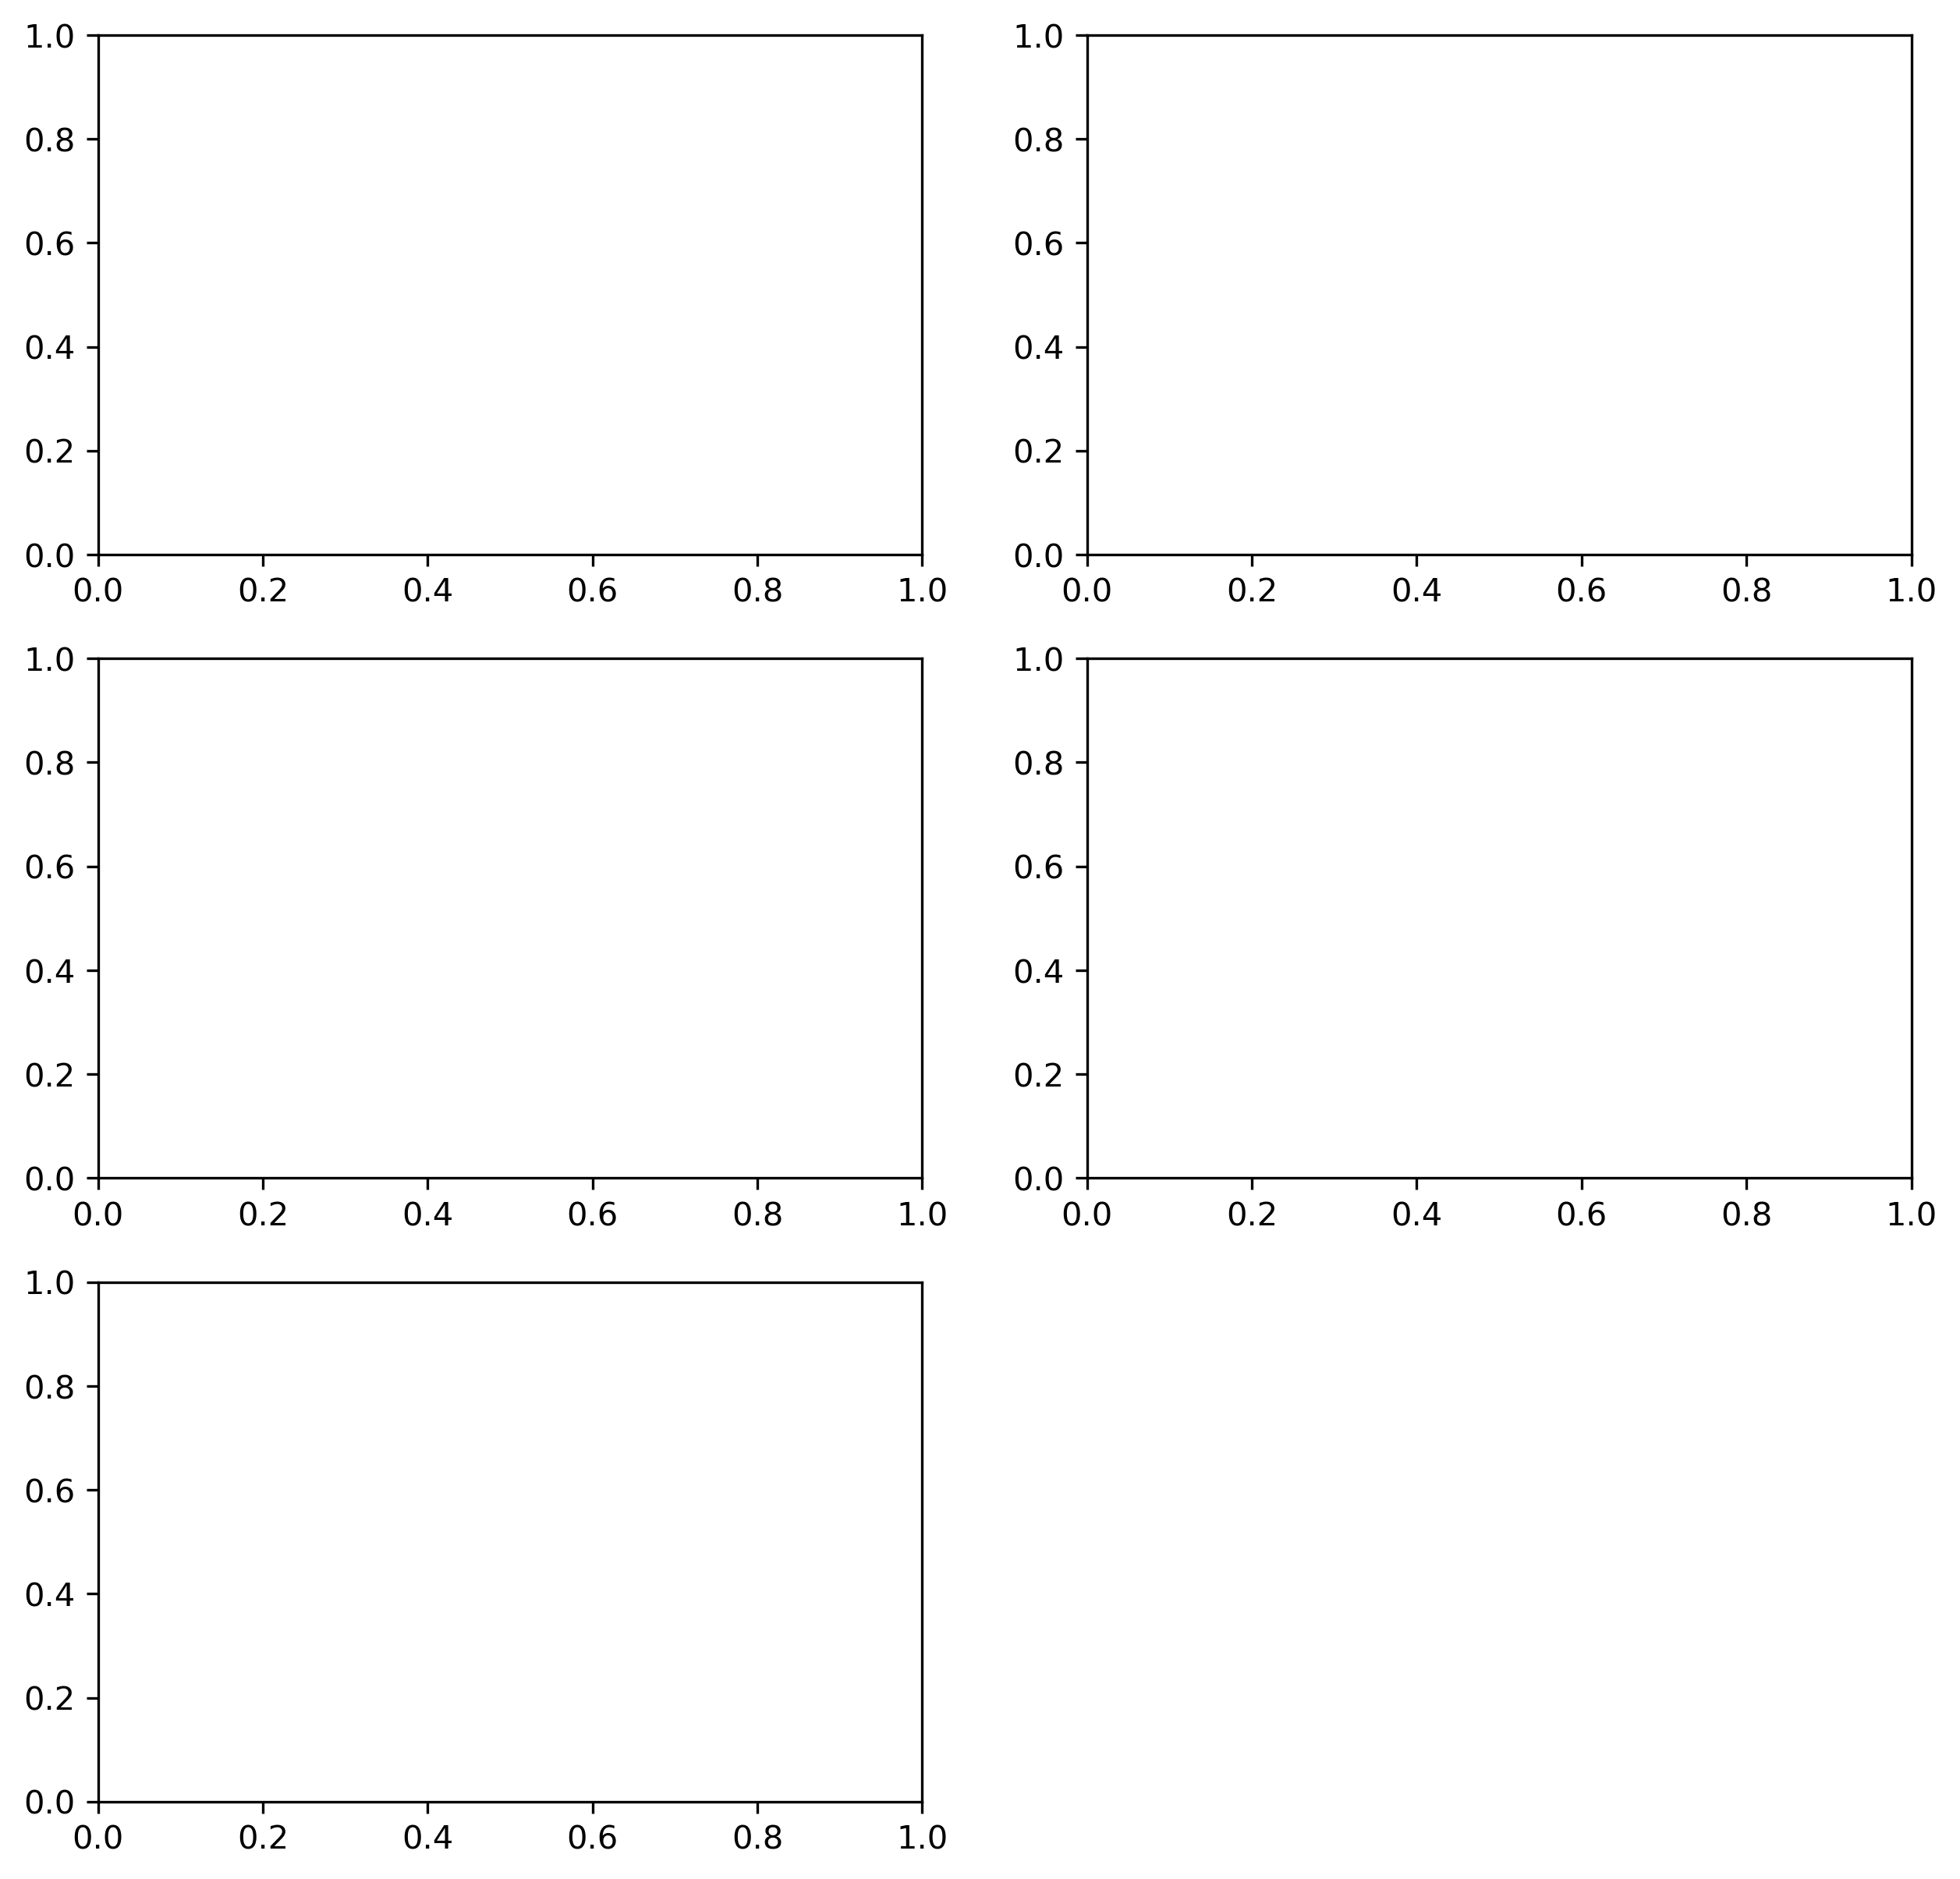

In [73]:
nrows, ncols = 3, 2
fig, ax = plt.subplots(nrows, ncols, dpi=300, figsize=(10,10))
ax[2, 1].axis('off')

basin_longname = ['Atlantic', 'Western Pacific', 'Eastern Pacific', 'Indian Ocean', 'Southern Hemisphere']
row_idx = 0
for idx, basin_prfx in enumerate(['at', 'wp', 'ep', 'io', 'sh']):
    print((idx+0)%3)
    
    if idx%ncols == 0 and idx>0:
        row_idx +=1
        
    basin_data = iris.load('data/{}tracks.nc'.format(basin_prfx))

    nsic, yearic = basin_data.extract('nsic')[0], basin_data.extract('yearic')[0]

    t=yearic - yearic[0]
    tt=t[1:] - t[:-1]
    yr_end = (tt.data > 0)
    yr_end = np.ma.append(yr_end, True)

    masked_n = np.ma.array(nsic.data, mask = ~yr_end)
    yr_plt = np.ma.array(yearic.data, mask = ~yr_end)

    
    ax[row_idx, idx % ncols].set_title('{}'.format(basin_longname[idx]))
    ax[row_idx, idx % ncols].scatter(yr_plt, masked_n, marker='x')

fig.suptitle('Number of tropical cyclones in each year in each basin')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#plt.savefig('number_cyclones_per_yr_by_basin.png')

In [71]:
# --tracks.nc, -- = basin_prefix (at, wp, ep, ... etc)
basin = 'sh'
basin_data = iris.load('{}tracks.nc'.format(basin))

nsic, yearic = basin_data.extract('nsic')[0], basin_data.extract('yearic')[0]
print(yearic.data[:50])
t=yearic - yearic[0]
print(t.data[:50])
tt=t[1:] - t[:-1]
print(tt.data[:50])
yr_end = (tt.data > 0)
yr_end = np.ma.append(yr_end, True)

masked_n = np.ma.array(nsic.data, mask = ~yr_end)
yr_plt = np.ma.array(yearic.data, mask = ~yr_end)

fig, ax = plt.subplots()
ax.set_title('Number of tropical cyclones in each year in {} basin'.format(basin))
ax.scatter(yr_plt, masked_n, marker='x')
plt.show()

[1848. 1848. 1848. 1848. 1848. 1848. 1848. 1848. 1851. 1851. 1851. 1851.
 1851. 1852. 1852. 1852. 1854. 1854. 1854. 1854. 1854. 1854. 1855. 1855.
 1855. 1855. 1856. 1856. 1856. 1857. 1857. 1857. 1857. 1857. 1857. 1857.
 1857. 1858. 1858. 1858. 1858. 1858. 1858. 1858. 1858. 1858. 1858. 1859.
 1859. 1859.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.  3.  4.  4.  4.  6.  6.
  6.  6.  6.  6.  7.  7.  7.  7.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9.
  9. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 11. 11. 11.]
[0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0.]


In [62]:
t=yearic - yearic[0]
t.shape

(4233,)

In [61]:
np.diff(yearic.data).shape

(4232,)

In [183]:
50%5

0